<div align="center">
    <h1> <b>DEPARTAMENTO DE RECURSOS HUMANOS</b></h1>
    <h1> <b>PROYECTO DE PREDICCIÓN DE LA FUGA DE EMPLEADOS</b></h1><br>
</div>
<div>
    <h3> <b>Algoritmos: Regresión Logística y Bosques Aleatorios.</b></h3>
</div>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

<td align="center">
    <img src="imagen_head.png" alt="Fashion MNIST sprite"  width="1000">
    <b>Figura 1. Predicción de la Retención de Empleados
</td>

## 1.1 Entendimiento del Negocio.

<td align="center">
    <img src="comprension_del_problema_1.png" alt="Fashion MNIST sprite"  width="1000">
</td>

## 1.2 Objetivo del Estudio y Características del Cliente.

<td align="center">
    <img src="comprension_del_problema_2.png" alt="Fashion MNIST sprite"  width="1000">
</td>

# TAREA #2: IMPORTAR LAS LIBRERÍAS. OBSERVACIONES PRINCIPALES DEL DATASET.

## 2.1 Importe de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.2 Cargar y Leer el Dataset. Configuración de la vista.

In [2]:
# Leer el dataset
employee = pd.read_csv("human_resources.csv")
# A mi me gusta ver todas las columnas, así que realizaré una modificación en la configuración de pandas.
# Esta función recibe dos argumentos: el nombre de la opción y la cantidad de columnas que queremos visualizar. 
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## 2.3 Leyenda.

### 2.3.1 Obtener el nombre de cada columna.

In [3]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 2.3.2 Leyenda.

##### 'Age': edad,
##### 'Attrition': los que se fueron de la empresa,
##### 'BusinessTravel': viaja por negocio,
##### 'DailyRate': tarifa diaria,
##### 'Department': departamento,
##### 'DistanceFromHome': cercanía hogar-trabajo,
##### 'Education': educación,
##### 'EducationField': no sé xD,
##### 'EmployeeCount': no se otra vez,
##### 'EmployeeNumber': numero del empleado,
##### 'EnvironmentSatisfaction': sentimiento de tranquilidad,
##### 'Gender': género,
##### 'HourlyRate': tarifa por hora,
##### 'JobInvolvement': si se compromete en el trabajo,
##### 'JobLevel': nota para el trabajo,
##### 'JobRole': que tan comodo esta en el rol,
##### 'JobSatisfaction': que tan feliz y satisfecho se siente de trabajar en este lugar,
##### 'MaritalStatus': estado civil,
##### 'MonthlyIncome': ingreso mensual,
##### 'MonthlyRate': tarifa mensual,
##### 'NumCompaniesWorked': cantidad de compañías en las que ya trabajó,
##### 'Over18': menor de edad,
##### 'OverTime': no se,
##### 'PercentSalaryHike',
##### 'PerformanceRating',
##### 'RelationshipSatisfaction': si se siente bien con la relacion,
##### 'StandardHours',
##### 'StockOptionLevel',
##### 'TotalWorkingYears': total de años trabajando,
##### 'TrainingTimesLastYear':,
##### 'WorkLifeBalance':,
##### 'YearsAtCompany': años en la compañía,
##### 'YearsInCurrentRole': años en este rol de trabajo,
##### 'YearsSinceLastPromotion': años desde la última promoción que tuvo,
##### 'YearsWithCurrManager': años bajo la supervisión del mismo jefe.

## 2.4 Primeras descripciones y conclusiones.

# Información de los datos

In [4]:
# Ver cuántos datos son enteros, flotantes u objetos
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Tenemos 9 enteros

In [6]:
# Ver las características estadísticas de los datos
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Nuestro dataset es de 35 características, cada una con 1470 puntos de datos.
#### Descripción general:

##### 1.- En promedio, la edad de los trabajadores dentro de la empresa es de 36 años.
##### 2.- LLevan con el mismo jefe 4 años y ya han trabajado 2 años desde la última promoción.
##### 3.- En promedio, han trabajado 11 años y los últimos 7 fueron en nuestra compañía, además llevan 4 años en el mismo rol.
##### 4.- Tienen ingresos de 6500 dólares por mes.


# TAREA #3: VISUALIZACIÓN DEL DATASET

## 3.1 Transformar entradas de texto en entradas numéricas.

In [7]:
# Ya que algunas columnas son objetos, como la columna Attrition (Yes & No) debemos cambiarlas a
# entero para poder visualizar. Primero revisamos cuántas respuestas hay en cada columna.
employee['Attrition'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [8]:
# De esta forma, podemos asegurarnos que solo existen las palabras No y Yes con esta misma escritura
# para cambiarlas por ceros y unos.

### Función lambda.

In [9]:
# Ahora reemplazamos la columna 'Attrition' por enteros usando la función lamda.
employee['Attrition'] = employee['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
# Revisamos
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [11]:
# Ya cambié attrition, así que puedo revisar de la misma forma la columna
# overtime (cuántas respuestas hay en cada columna).
employee['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [12]:
# Reemplazamos la columna 'OverTime' por enteros.
employee['OverTime'] = employee['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Revisamos.
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


## 3.2 Revisión e imputación de nulos.

### 3.2.1 Hallar nulos.

In [14]:
# Veamos si nos faltan datos (cantidad de datos nulos)
# Se puede revisar y contar cuántos son usando la función .isna y también se puede ordenar en forma
# ascendente.
employee.isna().sum().sort_values(ascending = False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

### 3.2.2 Mapa de calor.

<AxesSubplot: >

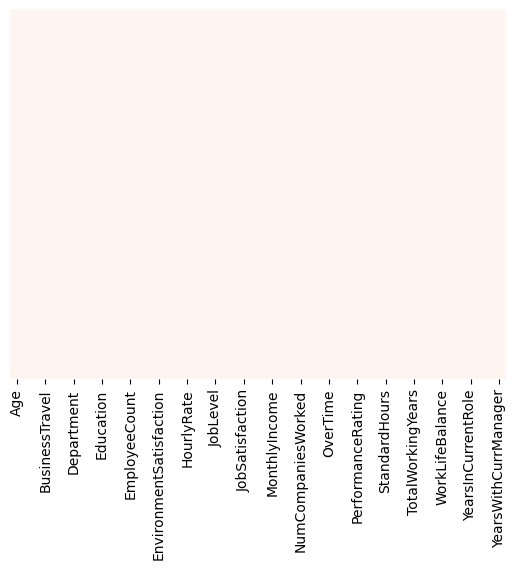

In [15]:
# No hay nulos y con esto es suficiente, pero si se quiere se puede hacer el mapa de calor:
# 1.- El dataset con la función isnull, se borran las etiquetas en el eje y.
# 2.- Se borra la barra de color que sale en la zona de leyenda
# 3.- Se agrega la paleta de colores
sns.heatmap(employee.isnull(), yticklabels=False, cbar=False, cmap='Reds')

### 3.2.3 Imputación de nulos

##### No hay nulos y con eso es suficiente.

## 3.3 Datos duplicados.

In [16]:
employee.duplicated().sum()

0

## 3.4 Eliminar datos inservibles.

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Attrition'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>],
       [<AxesSubplot: title={'center': 'EmployeeCount'}>,
        <AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>],
       [<AxesSubplot: title={'center': 'JobLevel'}>,
        <AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>],
       [<AxesSubplot: title={'center': 'OverTime'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>,
        <AxesSubplot: 

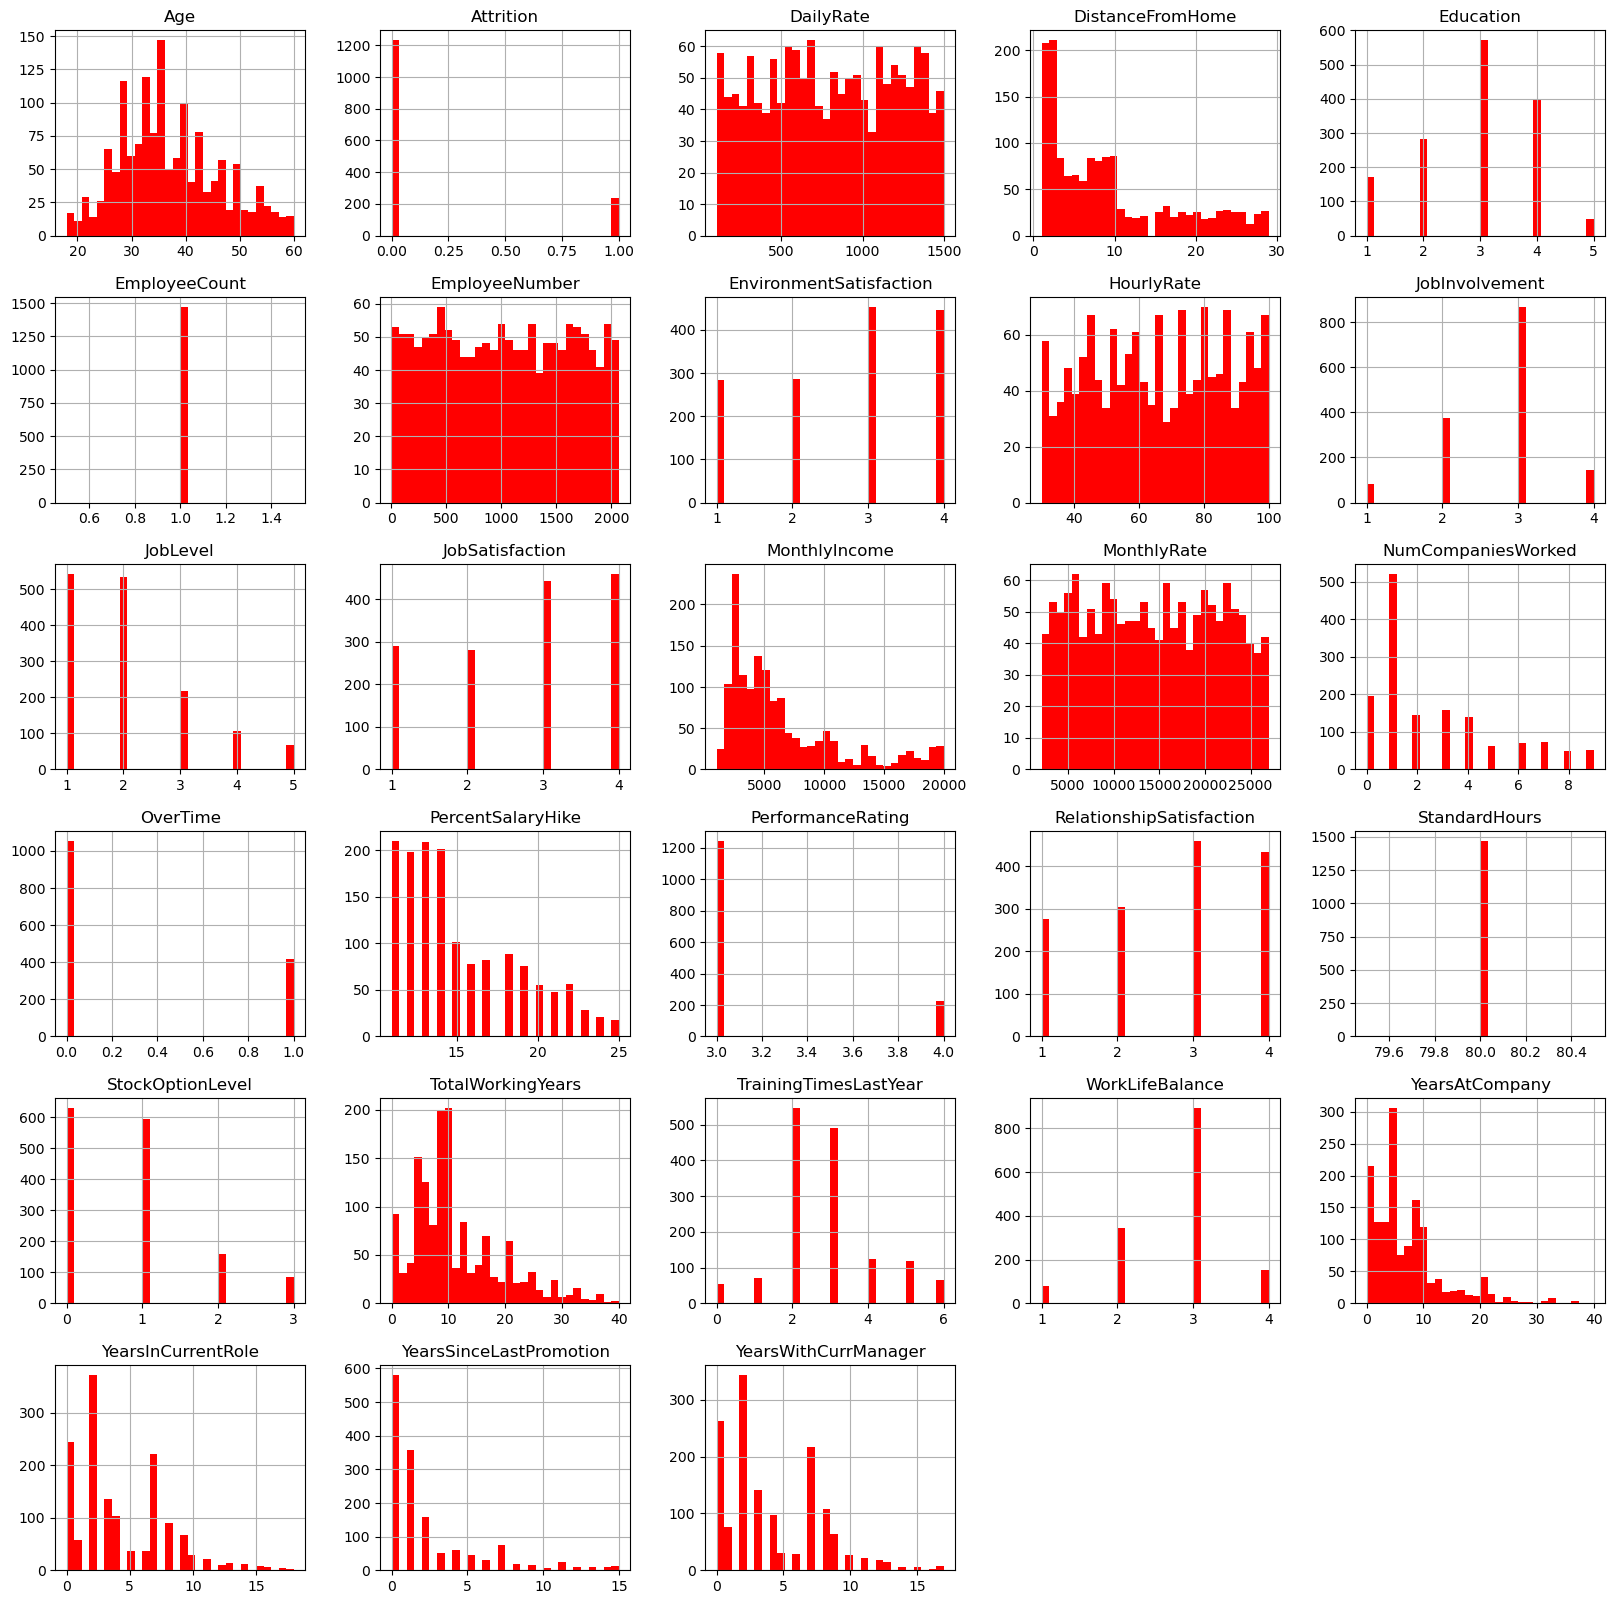

In [17]:
# Observaremos los histogramas de cada variable para decidir si eliminar alguna de ellas...
employee.hist(bins = 30, figsize = (20, 20), color ='r')

#### 1.- Eliminaremos la variable EmployeCount y StandardHours por ser respuesta única (no es variable si no varía).
#### 2.- Eliminaremos EmployeeNumber, ya que es el número de empleado.
#### 3.- Eliminaremos Over18, porque todos los empleados de la empresa deben ser mayores de edad.

In [18]:
# Inplace hace el cambio en el propio objeto en memoria y ajusta el data frame sin crear otra variable.
employee.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'], axis=1, inplace = True)

In [19]:
# Revisar
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


## 3.5 Observación de las columnas (variables, atributos, etc).

In [20]:
# Cantidad de columnas
cantidad_columnas = len(employee.columns)
cantidad_columnas

31

In [21]:
# Nombre de cada columna
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## 3.6 Gráficos.

### 3.6.1 Separar la variable attrition.

##### La variable predictora en este proyecto es attrition y para comparar usando la función describe, debo separar esta variable.
##### 1.- Los que dejan la empresa (1).
##### 2.- Los que NO dejan la empresa (0). 

#### Empleados que dejan y NO dejan la empresa:

In [22]:
# Contamos el número de empleados que se quedaron y que se fueron
# Parece que estamos ante un conjunto de datos desequilibrado (muchos que se quedan y pocos que se van)
left_df = employee[employee['Attrition'] == 1]
stayed_df = employee[employee['Attrition'] == 0]
print("El total de trabajadores es {},"
      "los que dejan la empresa son {}"
      "y los que permanecen son {}.".format(len(employee),len(left_df),len(stayed_df)))

print("Por lo tanto, un {:.1f}% de los trabajadores"
      "deja la empresa.".format(len(left_df)*100/len(employee)))

El total de trabajadores es 1470,los que dejan la empresa son 237y los que permanecen son 1233.
Por lo tanto, un 16.1% de los trabajadoresdeja la empresa.


### 3.6.2 Comparación entre los que dejan y los que NO dejan la empresa mediante estadísticos.

In [23]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [24]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### Conclusiones:
##### 1.- 'Age': la edad de los que se quedan es superior en cuanto a media, en todos los cuartiles y en el rango.
##### 2.- 'DailyRate': La tarifa diario de los empleados que se quedaron es mayor, tanto en media como mediana.
##### 3.- 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo.
##### 4.- 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos.
##### 5.- 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options.
##### 6.- 'MonthlyIncome' es significativamente superior en los empleados que se quedan.
#### OBSERVACIÓN: Existen muchas más columnas y conclusiones, que analizaremos más adelante mediante histogramas.

### 3.6.3 Comparar los que dejan y los que NO dejan la empresa mediante gráficos.

<AxesSubplot: xlabel='Age', ylabel='count'>

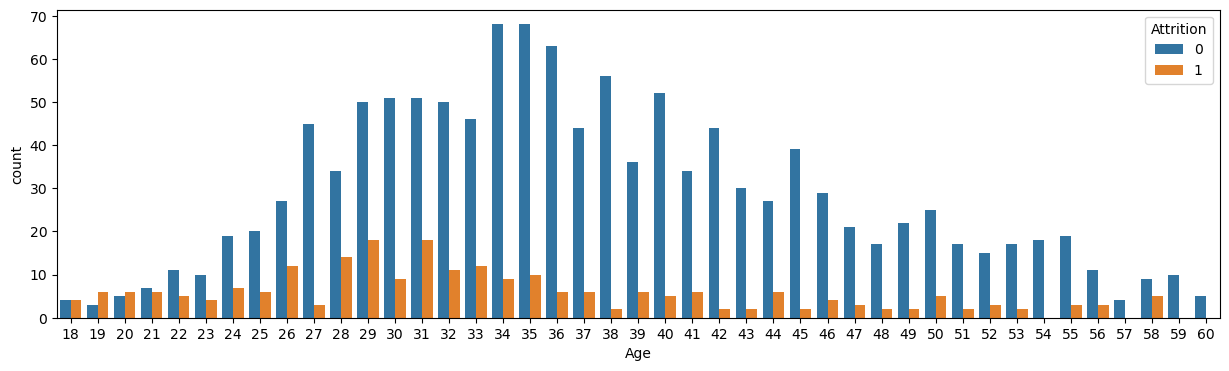

In [25]:
# Compararemos la edad de los empleados con 'Attrition' (dejar o no la empresa)
# Gráfico nuevo
plt.figure(figsize = [15,4])
# 1.- Realizaremos un conteo de los usuarios que caen en cada categoría extraídos de x = edad
# 2.- Asignaremos colores dependiendo del campo attrition (se queda o se va de la empresa) 
# 3.- Entregaremos el dataset a seaborn
sns.countplot(x = 'Age', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Entre los 18 y 21 años, más de la mitad de los empleados se van de la empresa.
##### 2- Los empleados de 54, 57, 59 y 60 años, no se van nunca de la empresa.
##### 3.- Las edad de las personas que más se van de la empresa esta entre 26 y 35 años. Antes y después son pocos los que se cambian de trabajo. 

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

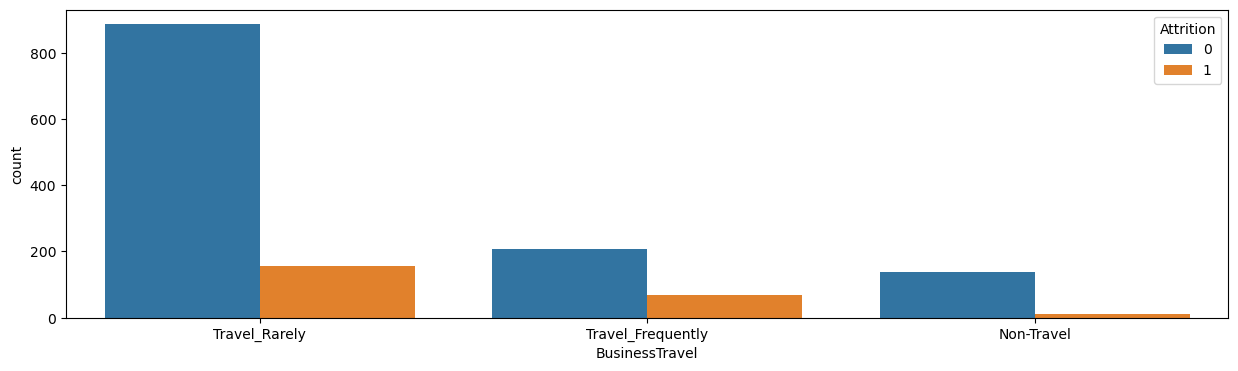

In [26]:
# Business travel

plt.figure(figsize = [15,4])
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Del grupo que no realiza viajes casi no existe fuga de personal.
##### 2- El grupo con mayor cantidad de fuga, son los trabajadores que raramente viajan.

<AxesSubplot: xlabel='DistanceFromHome', ylabel='count'>

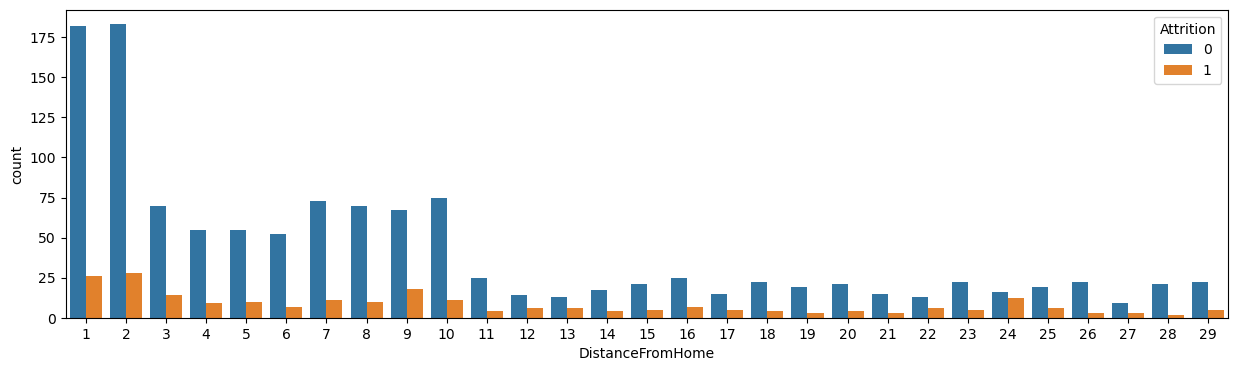

In [27]:
# Distancia desde casa

plt.figure(figsize = [15,4])
sns.countplot(x = 'DistanceFromHome', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La mayor cantidad de empleados de la empresa vive en un radio de 10 km del trabajo. 
##### 2.- A menos distancia, más empleados.
##### 3.- No parece haber relación entre los que se van de la empresa y la distancia desde la casa al trabajo.

<AxesSubplot: xlabel='Education', ylabel='count'>

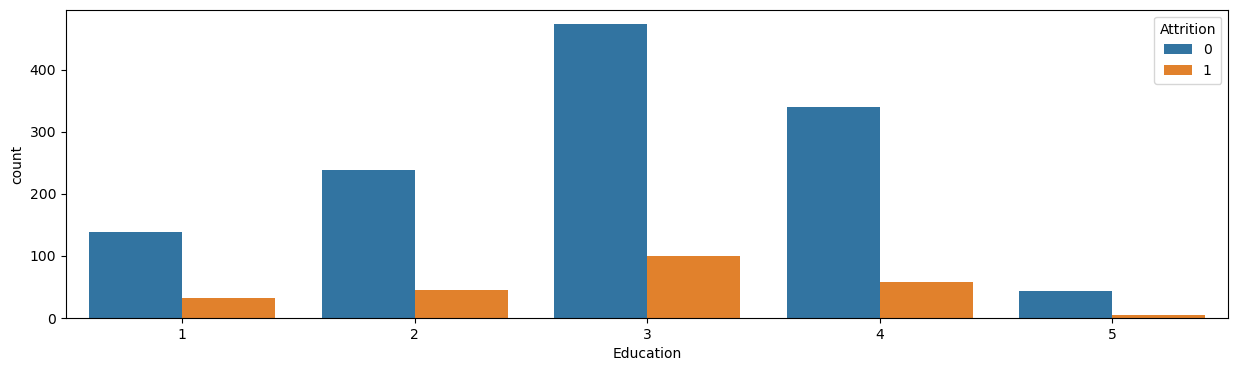

In [28]:
# Educación

plt.figure(figsize = [15,4])
sns.countplot(x = 'Education', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Las perdidas de empleados son mayores al tener una mejor educación, probablemente por tener mejores oportunidades.
##### 2.- Sin embargo, no existen perdidas cuando se trata del máximo escalafón del aprendizaje. Probablemente esta persona ya no tiene tiempo, ni deseos de cambiar de trabajo, ya que probablemente se encuentre enfocada en investigaciones de alto nivel o tengan puestos de alta jerarquía.

<AxesSubplot: xlabel='EnvironmentSatisfaction', ylabel='count'>

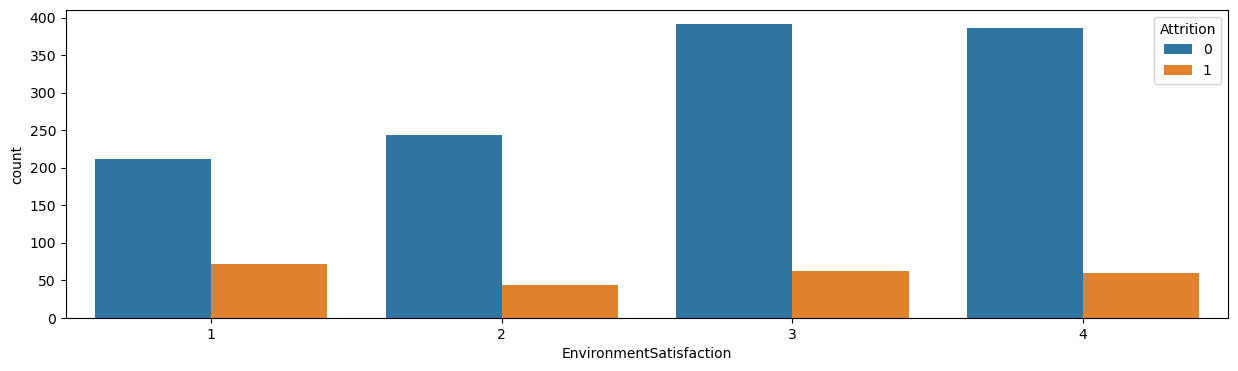

In [29]:
# Satisfacción con el medio ambiente

plt.figure(figsize = [15,4])
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Aproximadamente un 40% de las personas que están insatisfechas con su entorno, dejan la empresa. Son potenciales desertores.
##### 2.- Cuando se encuentran más satisfechos, el porcentaje de fuga es menor.

<AxesSubplot: xlabel='Gender', ylabel='count'>

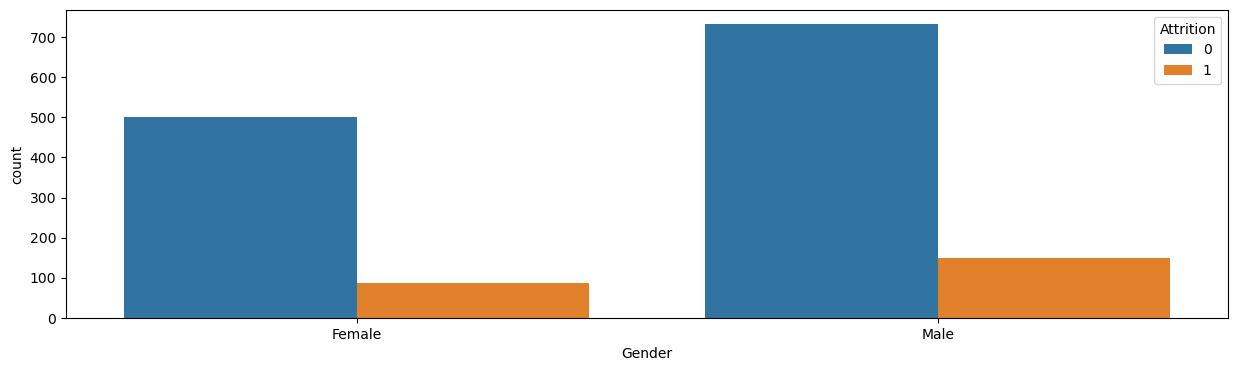

In [30]:
# Genero

plt.figure(figsize = [15,4])
sns.countplot(x = 'Gender', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Son más los hombres que dejan la empresa, que mujeres.
##### 2.- Sin embargo, hay muchos más hombres que mujeres en la empresa, por lo tanto, la muestra es desbalanceada. 
##### 3.- No podemos decir que exita alguna relación entre el género y las fugas.

<AxesSubplot: xlabel='HourlyRate', ylabel='count'>

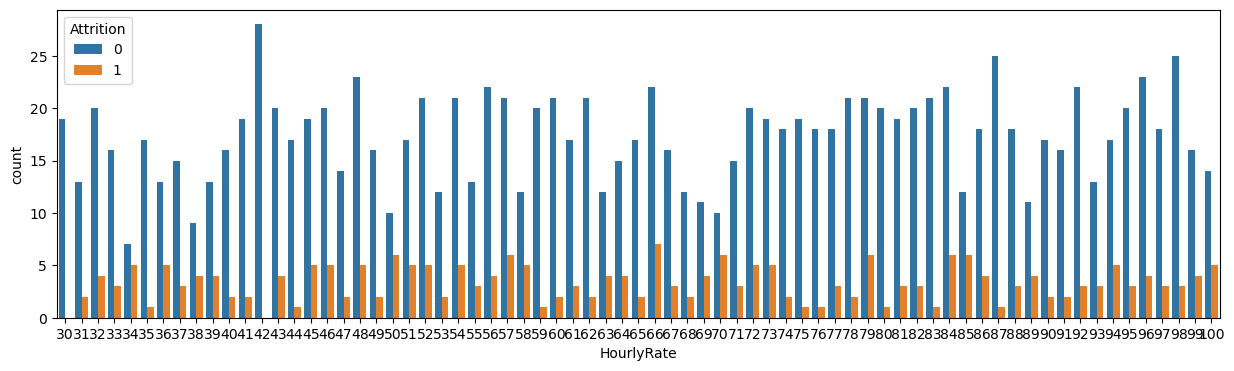

In [31]:
# Tarifa por hora

plt.figure(figsize = [15,4])
sns.countplot(x = 'HourlyRate', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Cuando son pocas las personas que ganan el mismo dinero (por ejemplo 34, 38, 50, 58, 69,70 y 85), tienden a irse de la empresa. 
##### 2.- Cuando existen muchas personas ganando el mismo dinero, dejan de irse de la empresa.
##### 3.- Esta relación no tiene una explicación lógica para mí.

<AxesSubplot: xlabel='JobInvolvement', ylabel='count'>

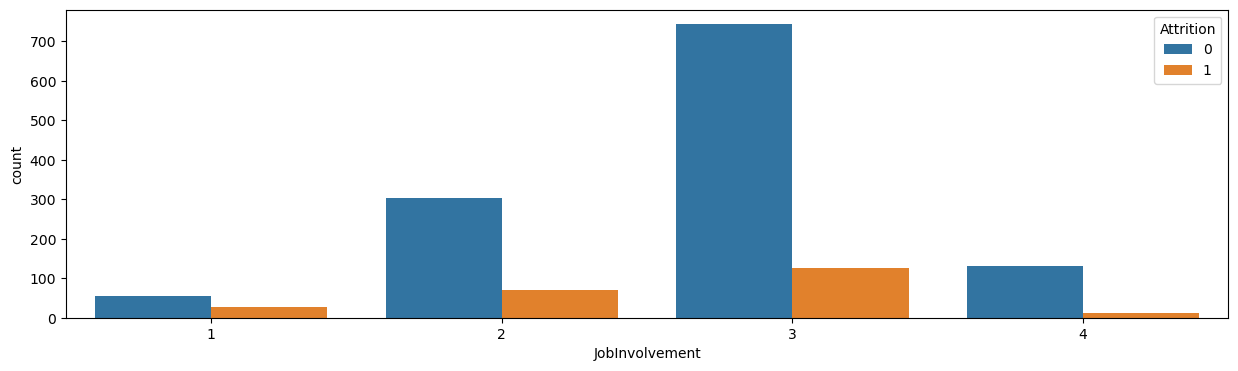

In [32]:
# Participación del trabajo

plt.figure(figsize = [15,4])
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- De los que participan poco de la empresa, más de un 50% renunció.
##### 2.- Cuando participan mucho de la empresa, no renuncian.
##### 3.- Aquí se aprecia un problema grave. Solo 130 de 1470 personas dicen tener una buena participación del trabajo (8,8%).

<AxesSubplot: xlabel='JobLevel', ylabel='count'>

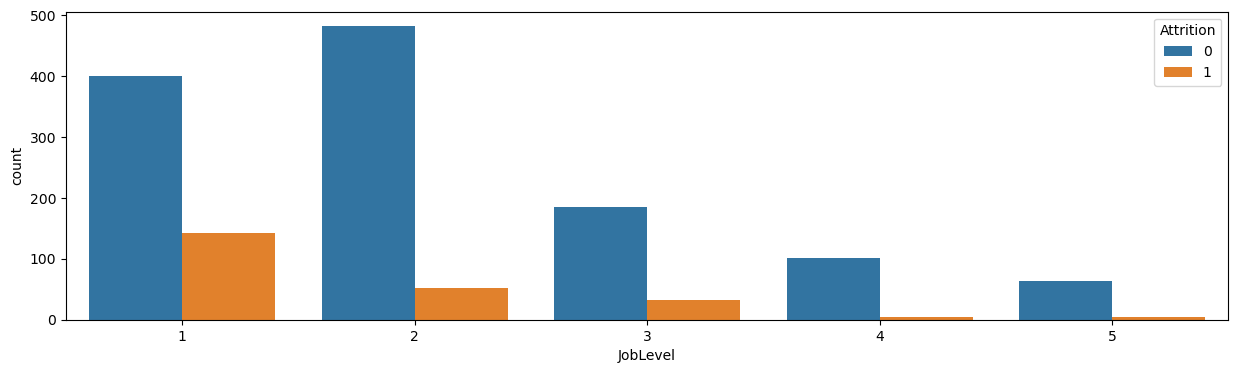

In [33]:
# Nivel de trabajo

plt.figure(figsize = [15,4])
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Cuando el nivel del trabajador es alto, las personas se mantienen en sus puestos de trabajo.
##### 2.- Cuando los niveles de los trabajadores son bajos, existe mucha fuga de empleados.

<AxesSubplot: xlabel='JobRole', ylabel='count'>

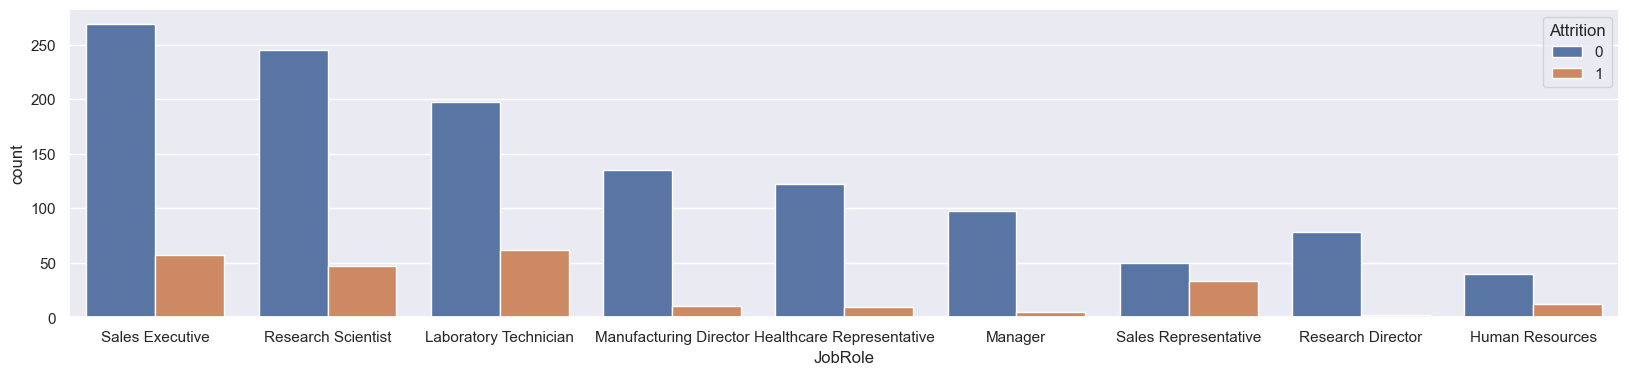

In [126]:
# Rol en el trabajo

plt.figure(figsize = [20,4])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Los departamentos que más poseen fugas son los de Ventas y Laboratorio tecnico.
##### 2.- Por otra parte, los que poseen menos fugas son los Directores de Investigación, los Directores, los Representantes de Atención Médica y los Directores de Manufactura.

<AxesSubplot: xlabel='JobSatisfaction', ylabel='count'>

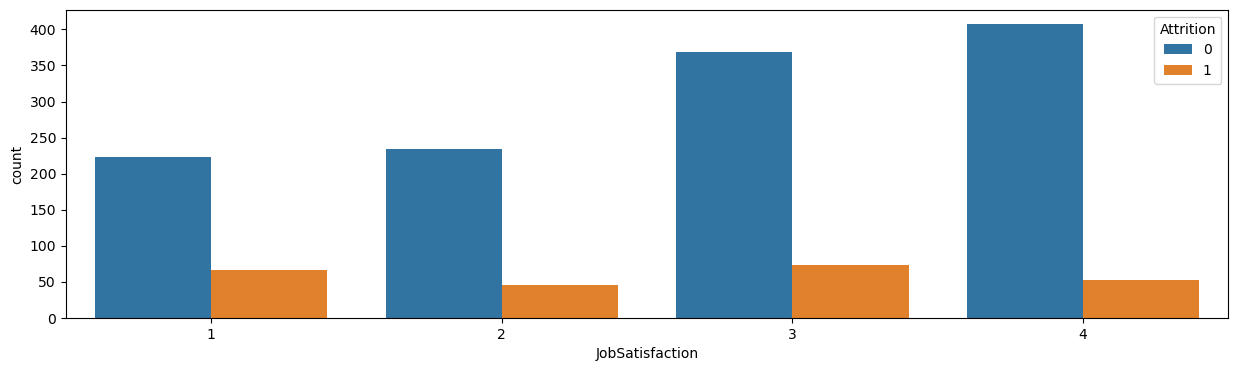

In [35]:
# Satisfacción por el trabajo

plt.figure(figsize = [15,4])
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La tendencia más clara es que a medida que aumenta satisfacción por el trabajo, disminuye la cantidad de renuncias de la empresa.

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

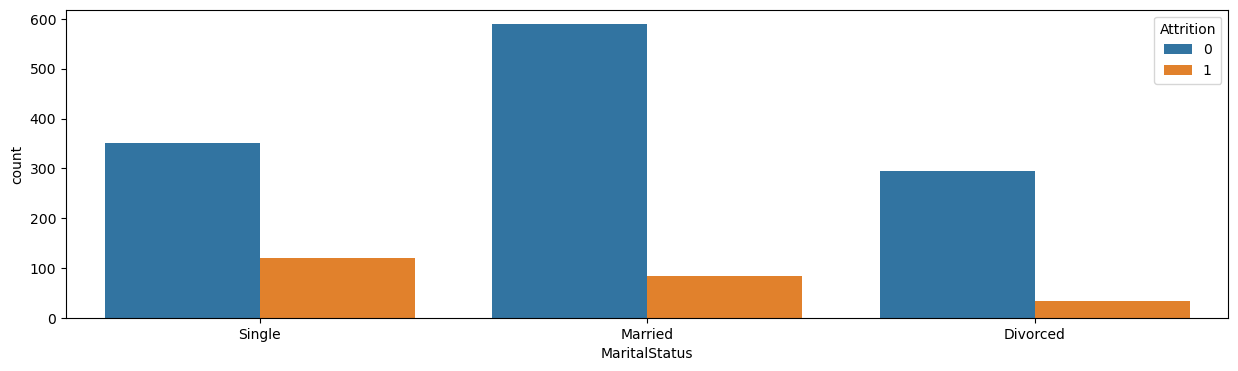

In [36]:
# Estado civil

plt.figure(figsize = [15,4])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Los soteros son los que más se retiran y cambian de trabajo.
##### 2.- Los divorciados y casados, casi no renuncian.

<AxesSubplot: xlabel='MonthlyIncome', ylabel='count'>

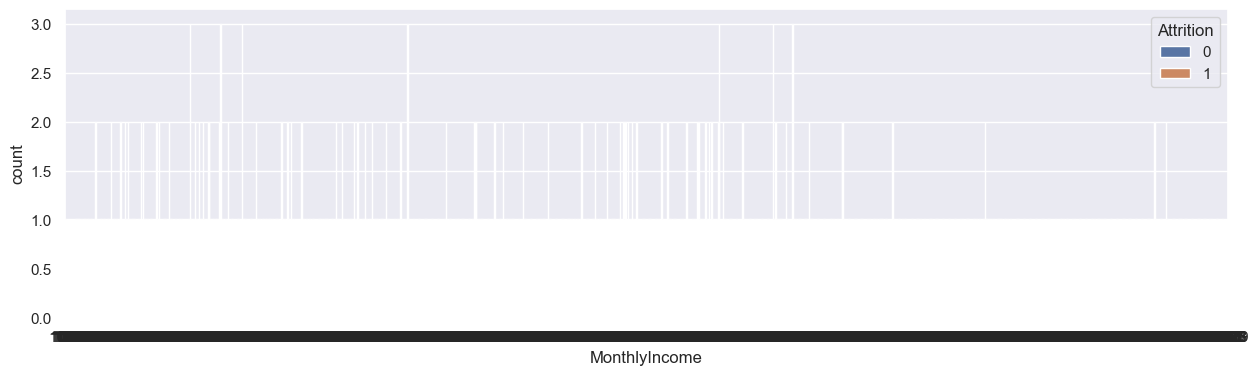

In [130]:
# No se ven los gráficos. Me imagino que tiene que ver con la cantidad de barras que tendrían
# que haber realizado.

plt.figure(figsize = [15,4])
sns.countplot(x = 'MonthlyIncome', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La cantidad de variables no permite su observación

<AxesSubplot: xlabel='MonthlyRate', ylabel='count'>

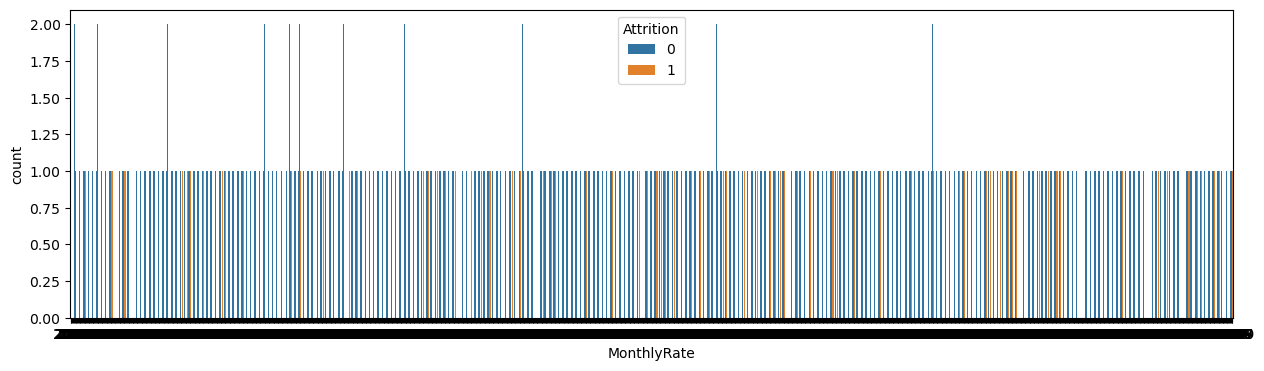

In [39]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'MonthlyRate', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La cantidad de variables no permite su observación

<AxesSubplot: xlabel='NumCompaniesWorked', ylabel='count'>

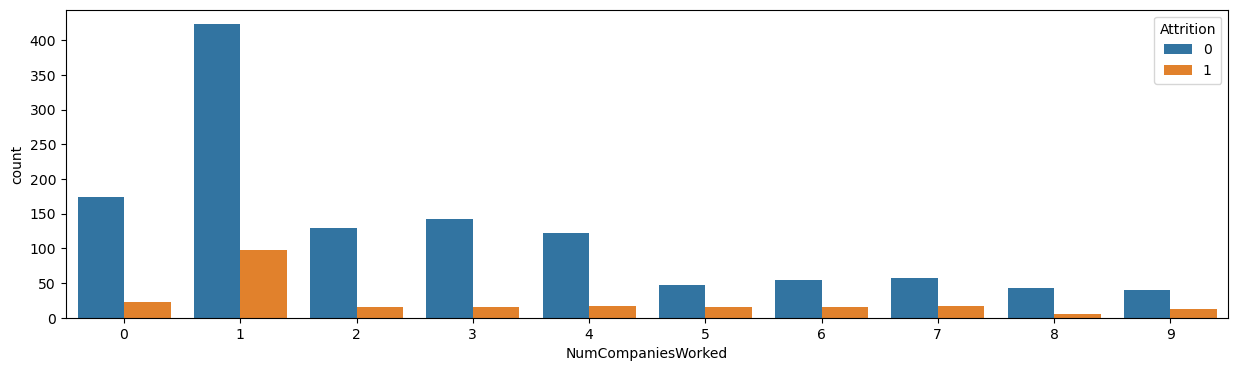

In [41]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'NumCompaniesWorked', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La mayor cantidad de personas que renuncian provienen del grupo que solo ha trabajado en una empresa anteriormente.
##### 2.- Sin embargo, la cantidad de personas que solo ha trabajado una vez es muy alta como para que esta observación sea correcta.

<AxesSubplot: xlabel='PercentSalaryHike', ylabel='count'>

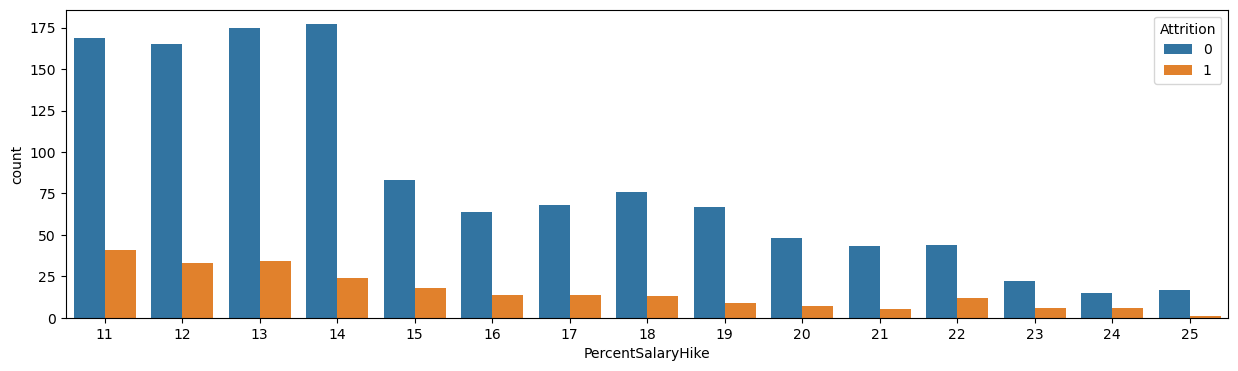

In [43]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'PercentSalaryHike', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- A medida que el porcentaje de aumento salarial aumenta, también disminuye la cantidad de personas que se van de la empresa y viceversa.

<AxesSubplot: xlabel='PerformanceRating', ylabel='count'>

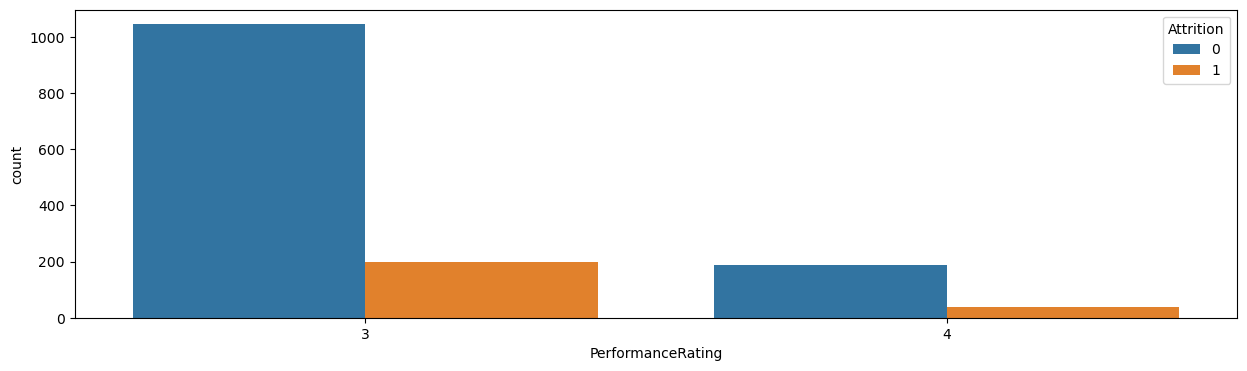

In [45]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'PerformanceRating', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Las personas que tienen nota 3 son muchas y al mismo tiempo poseen muchas fugas.
##### 2.- No hay relaciones entre estas variables.

<AxesSubplot: xlabel='RelationshipSatisfaction', ylabel='count'>

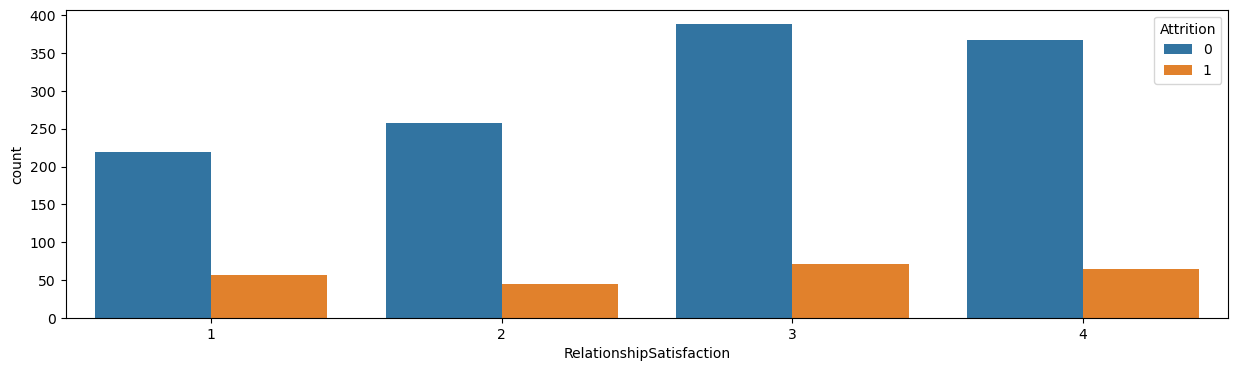

In [47]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'RelationshipSatisfaction', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- No se observan relaciones cincluyentes en estas variables.

<AxesSubplot: xlabel='StockOptionLevel', ylabel='count'>

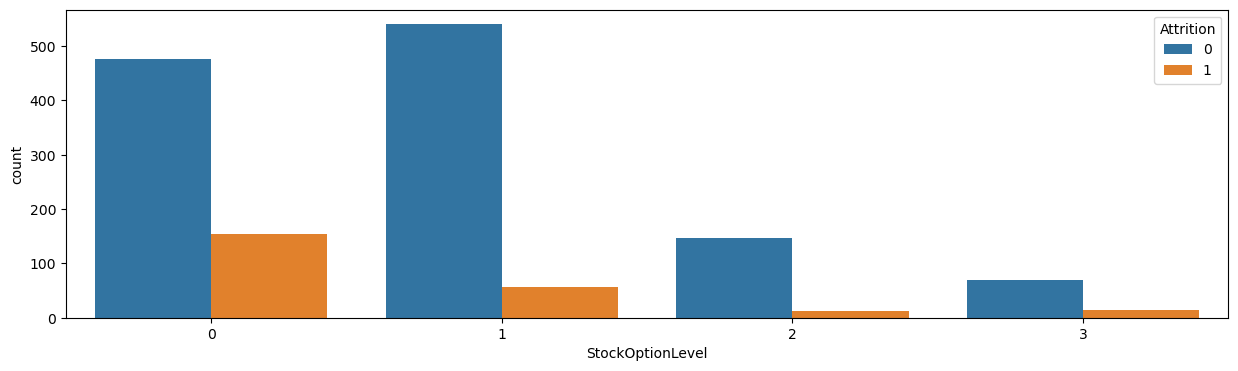

In [49]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'StockOptionLevel', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- El nivel de opciones sobre las acciones es notable, cuando no existe opción sobre las acciones se fugan muchas, muchas más personas de las que se fugarían si es que si tienen acciones en la empresa.
##### 2.- Tener parte de las acciones es un POTENCIAL factor de retención de empleados.

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='count'>

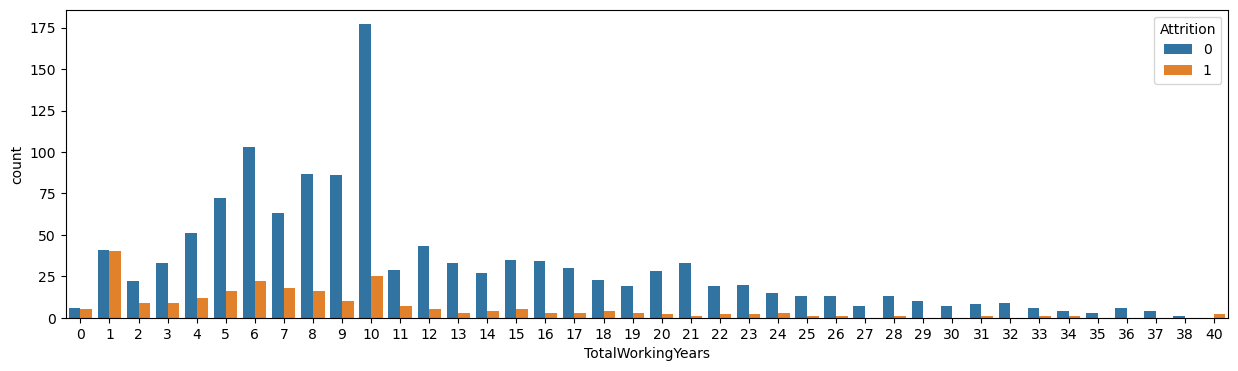

In [51]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'TotalWorkingYears', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Casi el 100% de las personas que llevan trabajando un año o menos se cambia de trabajo.
##### 2.- Casi un 50% de los que llevan dos años renuncian.
##### 3.- Despues del tercer año de trabajo, el empleado tiende a quedarse en su empresa.
##### 4.- Los empleados que trabajan 12 o más años, tienden a no dejar sus puestos de trabajo.

<AxesSubplot: xlabel='TrainingTimesLastYear', ylabel='count'>

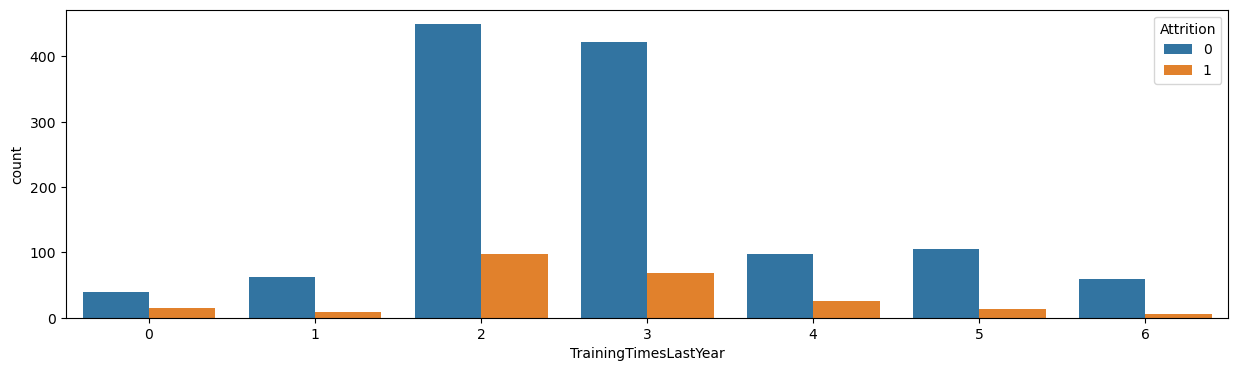

In [53]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'TrainingTimesLastYear', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Los grupos que tuvieron 1 y 6 tiempos de entrenamientos el año pasado, tienen poca fuga de empleados.
##### 2.- Los demás grupos tuvieron fugas normales de un 25% aproximadamente.
##### 3.- Los que tuvieron 2 y 3 tiempos, son los que más fugas tienen, sin embargo, también tienen una mayor frecuencia de personas.

<AxesSubplot: xlabel='WorkLifeBalance', ylabel='count'>

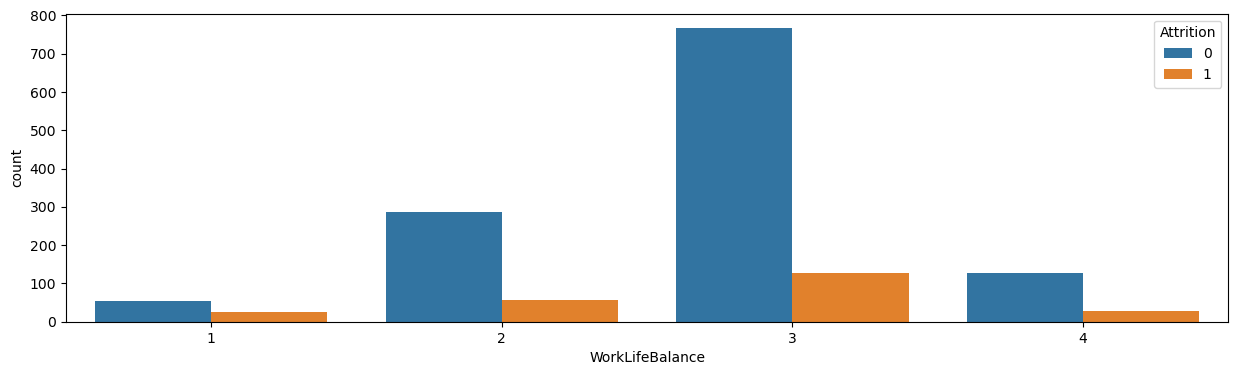

In [55]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'WorkLifeBalance', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- La mayoría de la gente de esta empresa siente que hay un buen equilibrio de la vida personal y el trabajo. Esto es muy bueno.
##### 2.- Sin embargo mantienen su porcentaje al 25% aproximadamente.
##### 3.- A excepción del que siente que hay un mal equilibrio, donde renuncian aproximadamente 25 de 50 personas.

<AxesSubplot: xlabel='YearsAtCompany', ylabel='count'>

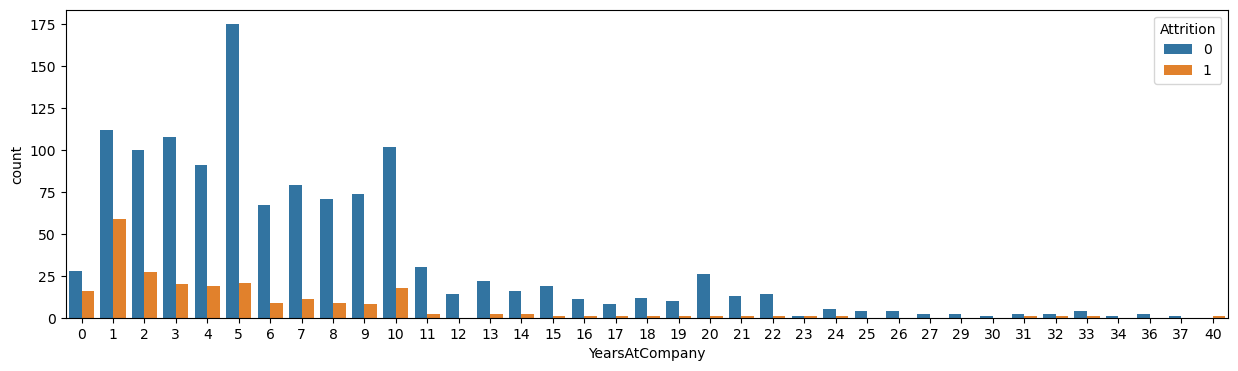

In [57]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'YearsAtCompany', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Años en la empresa definitivamente nos muestra que son pocas las personas que llevan más de 11 años trabajando y estas personas, en su mayoría, NO renuncian.
##### 2.- Por otra parte,se ve que los que llevan 0, 1 o 2 años en la empresa, lideran la fuga de empleados. 
##### 3.- Y a partir del tercer año de trabajo en la compañía, la fuga se reduce.

<AxesSubplot: xlabel='YearsInCurrentRole', ylabel='count'>

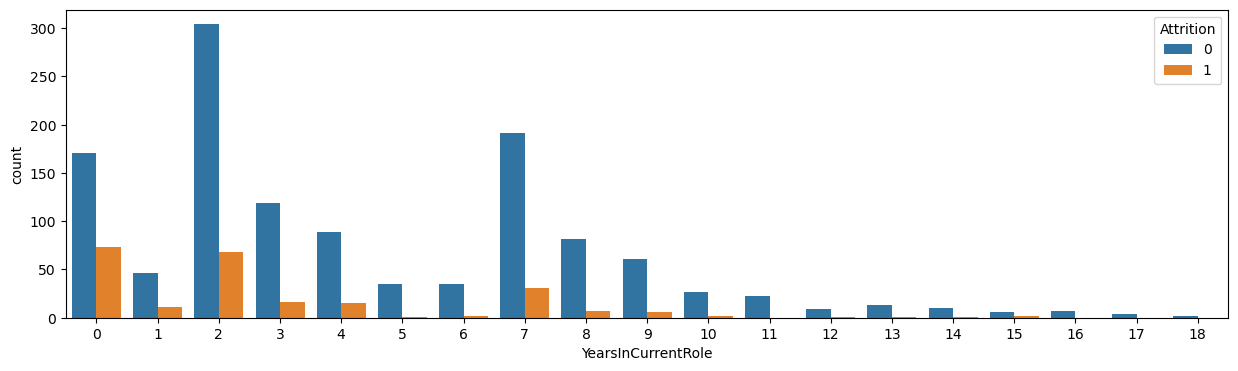

In [59]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'YearsInCurrentRole', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Cuando las personas llevan más de cinco años en el rol actual, disminuye considerablemente la fuga de empleados.
##### 2.- A excepción de llegado el año 7, donde vuelve la fuga de empleados al porcentaje normal.
##### 3.- Cuando las personas no tienen más de un año en el rol actual, casi el 50% de ellos se retira de la empresa.

<AxesSubplot: xlabel='YearsSinceLastPromotion', ylabel='count'>

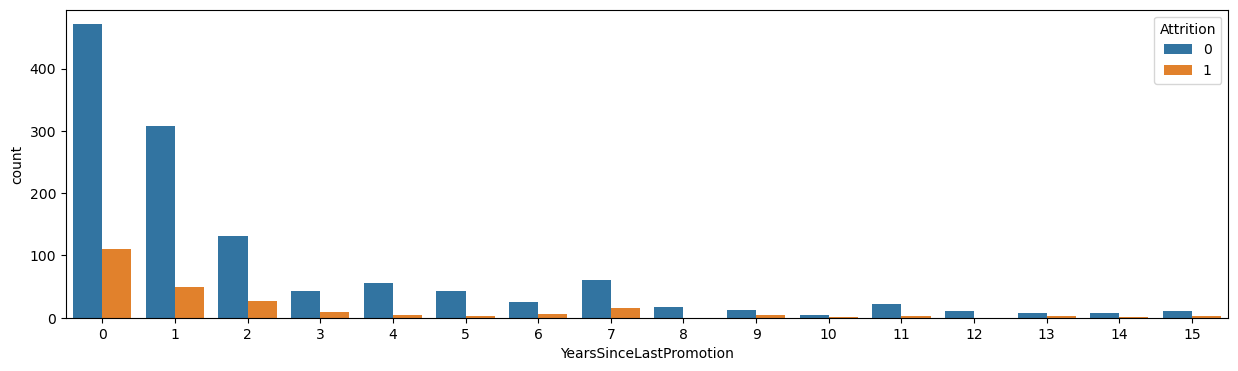

In [61]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'YearsSinceLastPromotion', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Cuando los trabajadores pasan mucho tiempo sin ser promovidos, disminuyen sus ganas de renunciar a la empresa.
##### 2.- Sin embargo, son casi 1100 personas, las que han sido promovidas en los últimos 2 años.

<AxesSubplot: xlabel='YearsWithCurrManager', ylabel='count'>

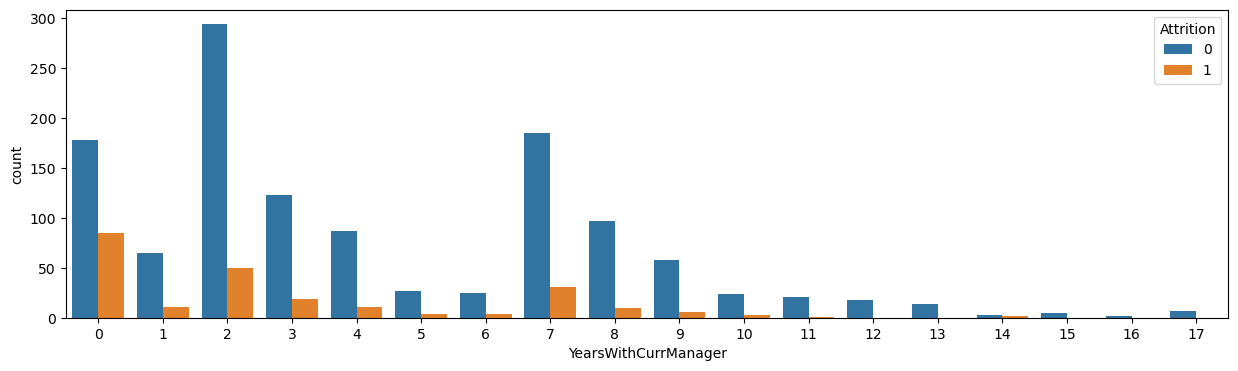

In [63]:
plt.figure(figsize = [15,4])
sns.countplot(x = 'YearsWithCurrManager', hue = 'Attrition', data = employee)

#### Conclusiones:
##### 1.- Las personas que llevan 11 o más años con el mismo jefe, tienden a quedarse en la empresa.
##### 2.- Los que no llevan nada de tiempo con el mismo jefe, son los que más dejan a empresa.

## CORRELACIONES

<AxesSubplot: >

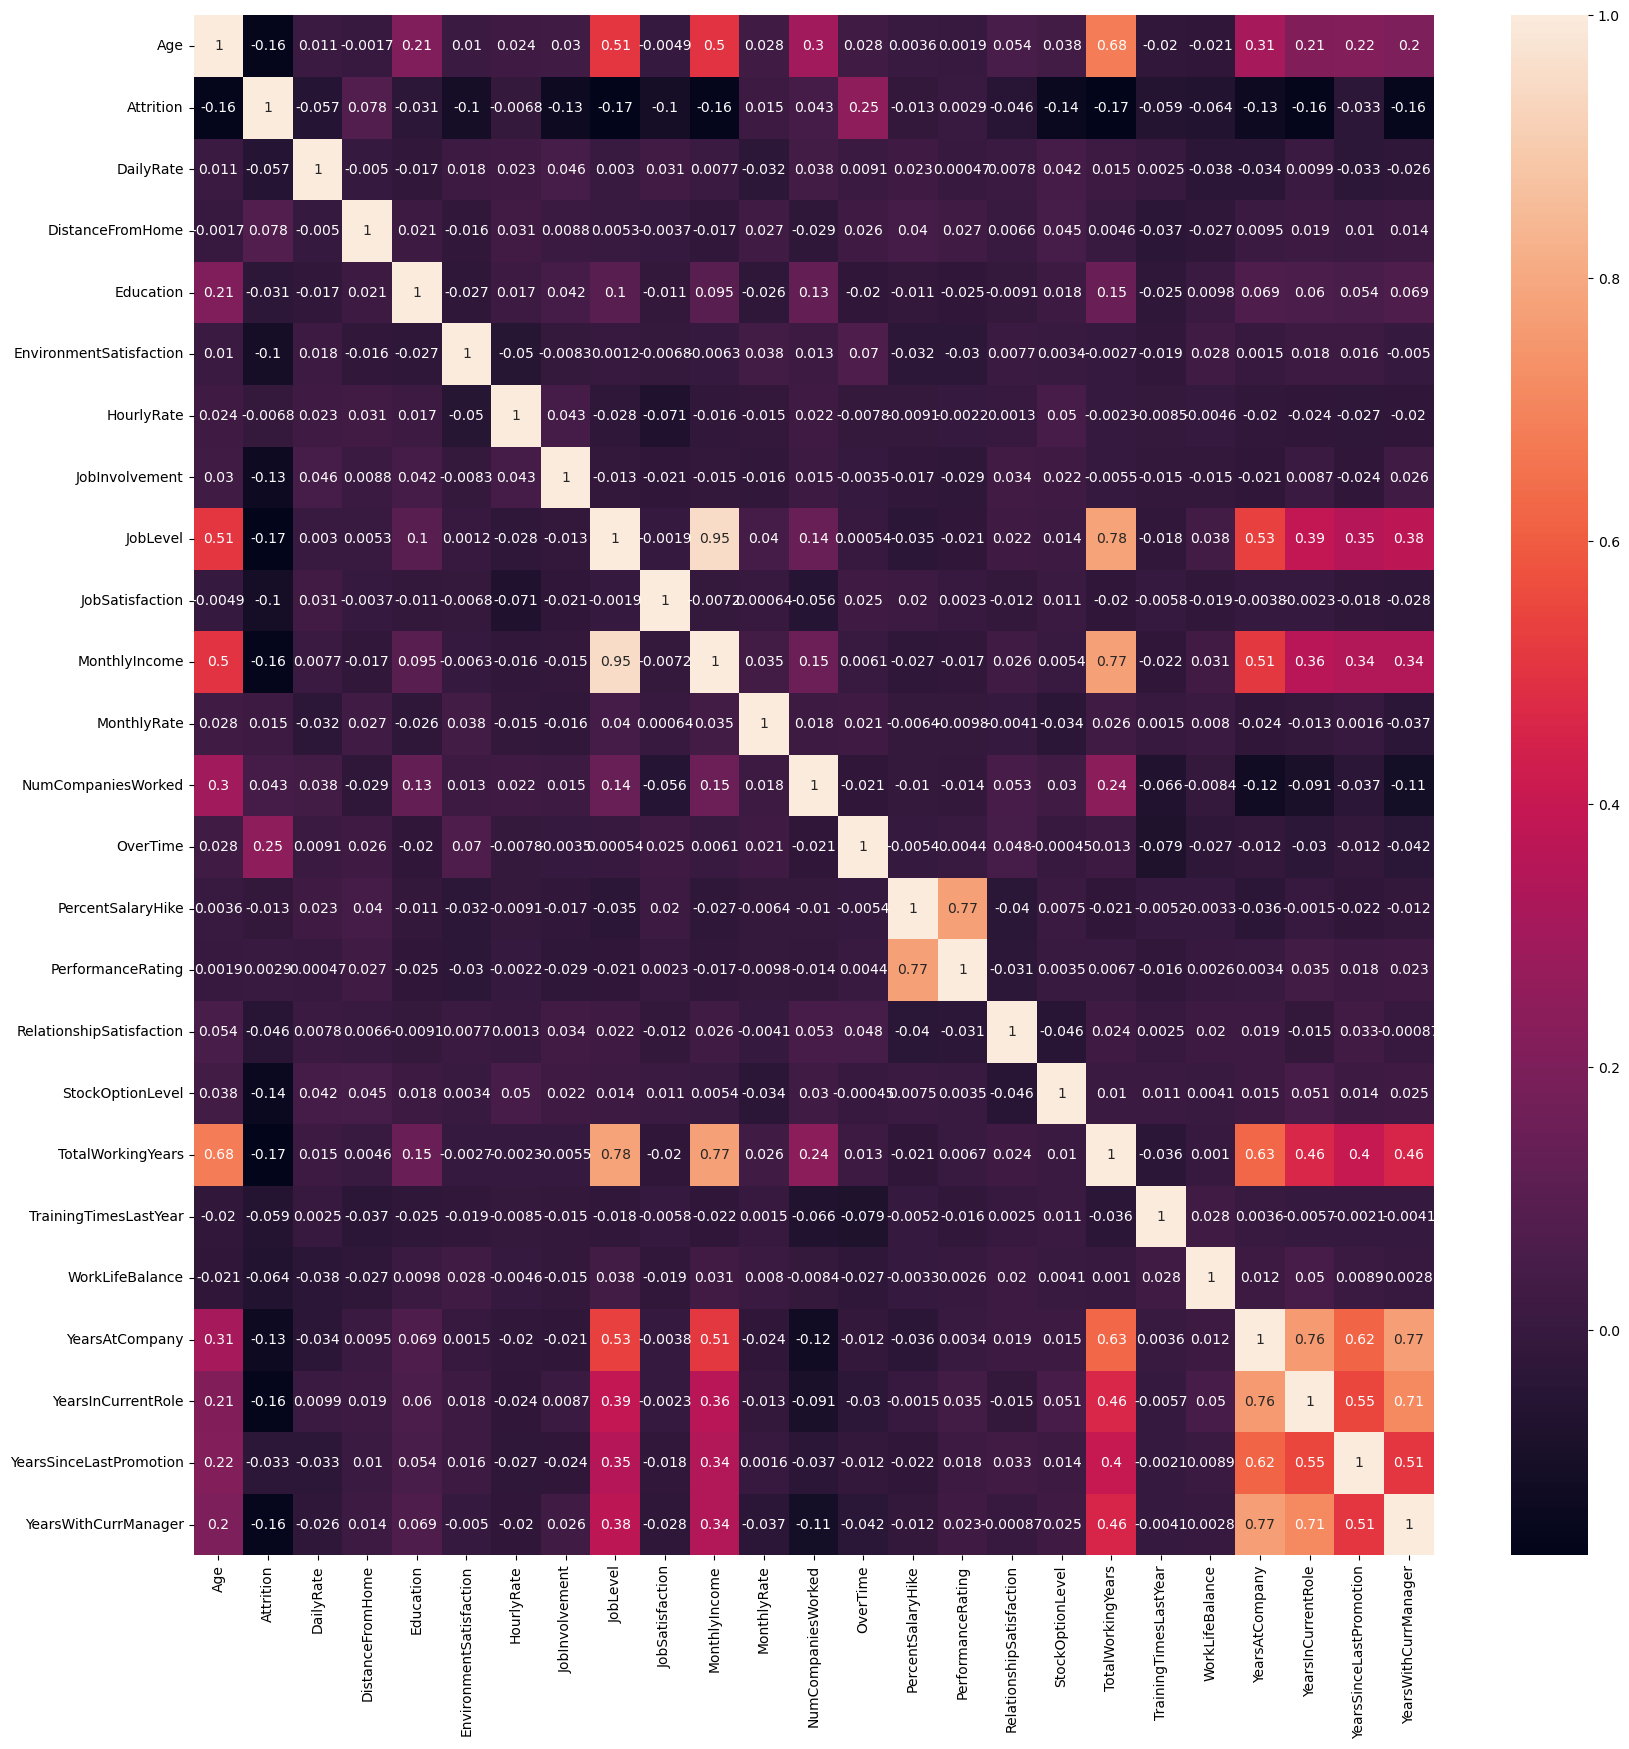

In [65]:
correlations = employee.corr()
f, ax = plt.subplots(figsize = (20,20)) # grafico en forma de mapa de calor
sns.heatmap(correlations, annot = True) # Pintar las correlations


## Correlaciones
#### 1.- Job level está altamente correlacionado con el número total de años de trabajo
#### 2.- Monthly income está muy altamente correlacionado con Job level
#### 3.- Monthly income está altamente correlacionado con el número total de horas de trabajo
#### 4.- Age está altamente correlacionado con los ingresos mensuales
#### 5.- PercentSalaryHike esta correlacionado con PerformanceRating1

## Gráficos de Kernel Density Estimate
### Para visualizar la densidad de probabilidad de variables continuas

C:\Users\Danko\AppData\Local\Temp\ipykernel_5548\3624596519.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'r')
C:\Users\Danko\AppData\Local\Temp\ipykernel_5548\3624596519.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')


Text(0.5, 0, 'Distancia desde la casa al trabajo')

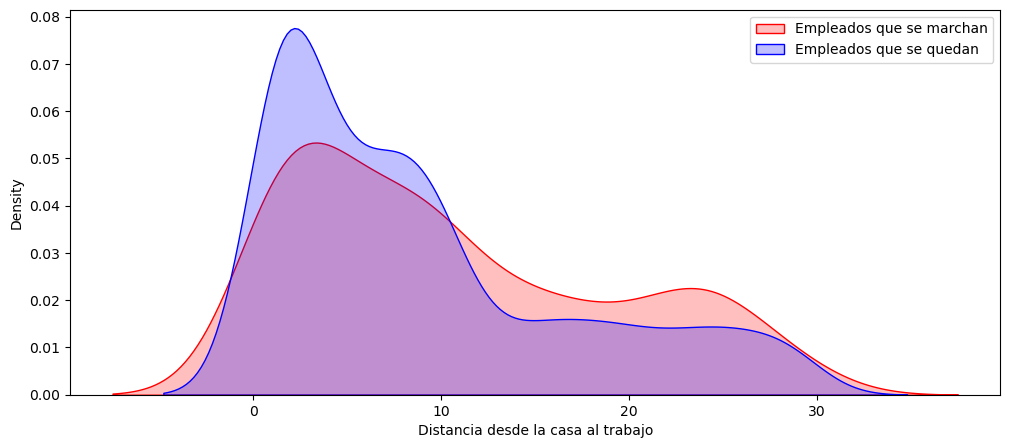

In [66]:
# 1.- Creamos la figura
# 2.- Usamos la función de Kernel Density Estimate (kdeplot)
# 3.- Anotamos la caracteristica que queremos estudiar (distancia)
# 4.- Diferenciamos el Label dándole nombre
# 5.- Usamos shade para que no quede opaco y aparezca semitransparente
# 6.- Le damos color
# 7.- Imprimimos la leyenda
plt.figure(figsize=(12,5))
sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()

plt.xlabel('Distancia desde la casa al trabajo')

### Gráfico de densidad de probabilidad "Años con el gerente actual" y "Total de años trabajando".

C:\Users\Danko\AppData\Local\Temp\ipykernel_5548\2241963109.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
C:\Users\Danko\AppData\Local\Temp\ipykernel_5548\2241963109.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')
C:\Users\Danko\AppData\Local\Temp\ipykernel_5548\2241963109.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
C:\Use

Text(0.5, 0, 'Total de años trabajando')

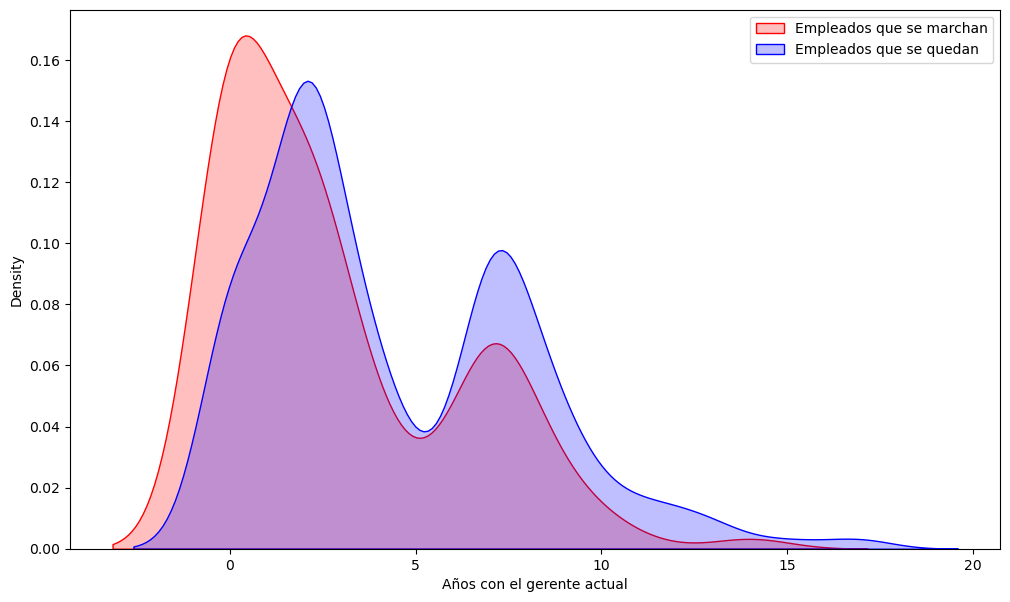

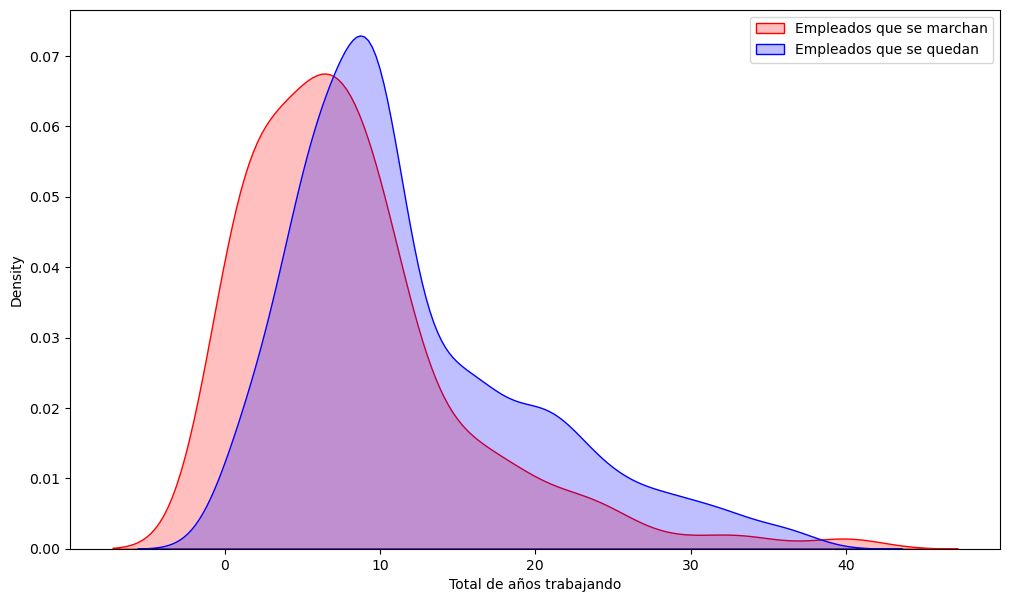

In [67]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()
plt.xlabel('Años con el gerente actual')

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()
plt.xlabel('Total de años trabajando')



## Diagrama de Cajon

<AxesSubplot: xlabel='Gender', ylabel='MonthlyIncome'>

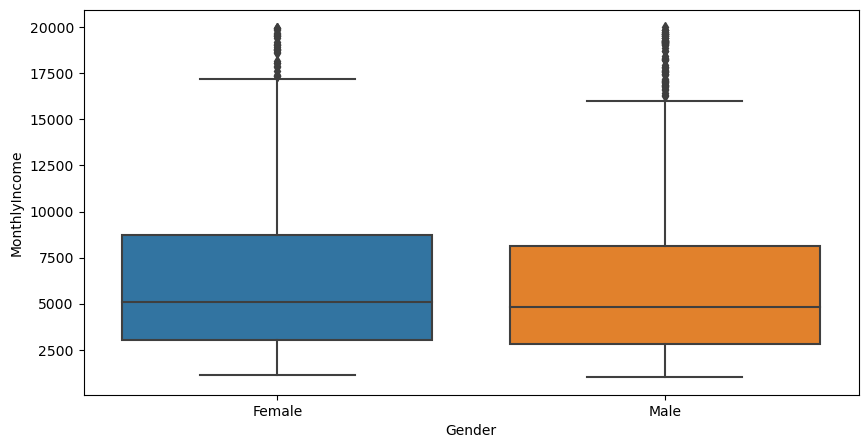

In [68]:
# Veamos el Gender vs. Monthly Income
# 1.- hacemos la figura
# 2.- hacemos el boxplot con el eje x ingreso mensual y el eje y el género
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender', y= 'MonthlyIncome', data = employee)

<AxesSubplot: xlabel='JobRole', ylabel='MonthlyIncome'>

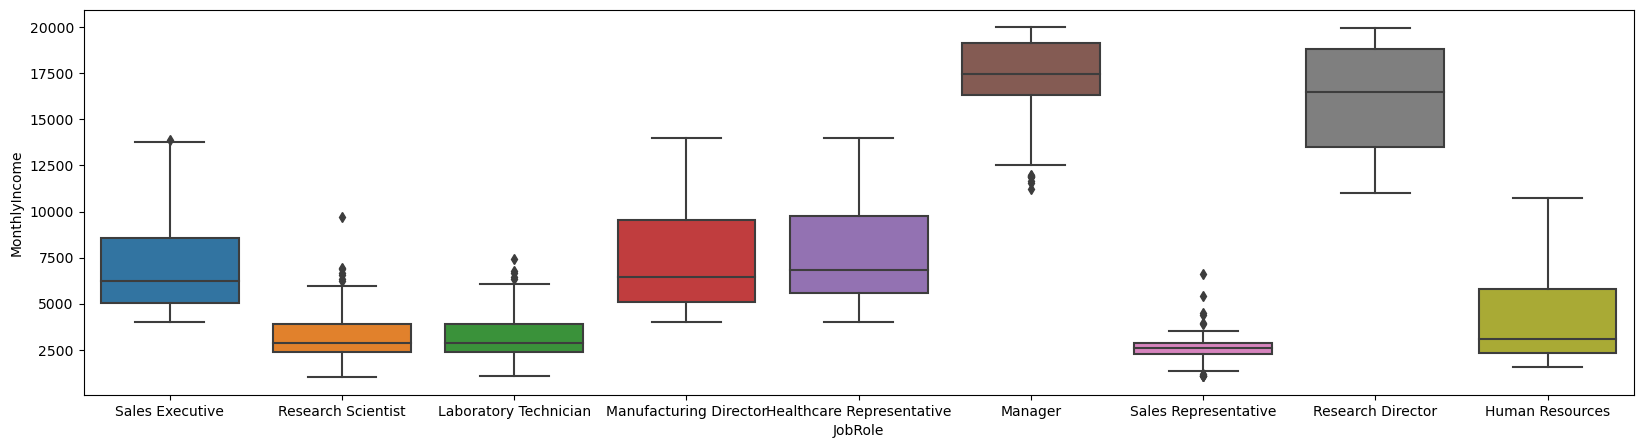

In [69]:
# Veamos el Monthly Income vs. Job Role
# 1.- hacemos la figura
# 2.- hacemos el boxplot con el eje x ingreso mensual y el eje y el género
plt.figure(figsize=(20,5))
sns.boxplot(x='JobRole', y= 'MonthlyIncome', data = employee)

## Conclusiones:
#### 1.- Entre hombres y mujeres no existe una diferencia significativa entre los sueldos.
#### 2.- El departamento que recibe menos ingresos de manera mensual es el depto de ventas, luego le siguen los departamentos de investigación científica y los técnicos de laboratorio.

# TAREA #4: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

## Ahora crearemos 3 dataframes para variables numéricas, categóricas y para la unión de ambas.

In [70]:
X_cat = employee[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [71]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


#### Para codificar los datos categóricos puedo usar OneHotEncoder de Scikit-Learn o la función Getdummies de Pandas.
## Función OneHotEncoder

In [72]:
from sklearn.preprocessing import OneHotEncoder # Crea tantas columnas como diferentes existan en todas las columnas
onehotencoder = OneHotEncoder() # Crear objeto de la librería OHE
X_cat = onehotencoder.fit_transform(X_cat).toarray() # Usar el objeto para que realice las transformaciones
# sobreescribiendo la variable X_cat en formato array (.toarray)

In [73]:
# Ver tamaño del array
X_cat.shape

(1470, 26)

In [74]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Ahora a crear un array de todas las variables numéricas (hay que rescatarlas usando un código de Pandas)

In [75]:
columns_names = employee.columns.values
columns_names

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [76]:
# Dataframe variables numéricas. Notemos que hemos elminado la columna target, 'Atrittion' y todas las categóricas.
X_numerical = employee[['Age', 'DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate','NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
       'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [77]:
# Revisar
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


## Unimos los dataframes

In [78]:
X_all = pd.concat([X_cat,X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


## En este punto ya hemos realizado correctamente nuestra decodificación para transformar las variables categóricas a numéricas. Sin embargo, luego del proceso, me quedo sin dudar con la opción GETDUMMIES de Pandas.

# Función GetDummies

### ADVERTENCIA
#### 1.- Si la variable cualitativa es NOMINAL BINARIA, es estrictamente necesario eliminar la primera columna para evitar la llamada "trampa de la variable dummie".
#### 1.1.- Sin embargo en este caso, al usar Random Forest y RNA no hace falta, puesto que no es análisis lineal. 
#### 2.- Si la variable cualitativa es NOMINAL NO BINARIA, no se debe borrar ninguna columna.
#### 3.- Si la variable cualitativa es ORDINAL, hay que darle un peso específico y distinto a cada respuesta en una sola columna, cosa que se puede hacer reempazando con la función Lambda. Ejemplo: data['nombre_columna'] = data['nombre_columna'].apply(lambda x: 0 if x == 'No tiene hijos', 1 elif x == 'Tiene 1 o 2 hijos' else 2))
#### Para más información ver el video https://www.youtube.com/watch?v=KO7Tc0i4UEA&ab_channel=RocioChavezCienciadeDatos

In [79]:
X_all = pd.get_dummies(employee, drop_first = False)

In [80]:
# Revisamos
X_all

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### En este caso, solo borraremos la columna Gender_Female (Única Binaria)

In [81]:
X_all.drop(['Gender_Female'], axis=1, inplace = True)

In [82]:
# Revisamos
X_all

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [83]:
# Pero para que quede el dataframe como el anterior, debemos borrar la columna Attrition:
X_all.drop(['Attrition'], axis=1, inplace = True)

In [84]:
# Revisar
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## ESCALAMIENTO DE LAS VARIABLES: último punto de la limpieza de datos. 

In [85]:
# Importamos la biblioteca a usar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [86]:
# revisamos
X

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

#### excelente, se ha creado un array con todos los datos escalados para que los algoritmos no infravaloren a los datos más pequeños.

In [87]:
y = employee['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#### y por este otro lado, tenemos un array con todos los valores de la variable a predecir

## Otra forma de obtener las variables numéricas y categóricas sería:

In [88]:
x_numerical = employee._get_numeric_data()
x_numerical

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [89]:
x_cat = employee.drop(columns = x_numerical.columns)
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


## Otra forma de MÁS para obtener las variables numéricas y categóricas:

In [90]:
X_categoricas = employee[employee.columns[ employee.dtypes == object ]]
X_numericas = employee[employee.columns[ employee.dtypes == np.int64 ].drop('Attrition')]

In [91]:
# Revisamos
X_categoricas

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [92]:
# Revisamos
X_numericas

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


# TAREA #5: ENTENDER LA TEORÍA DETRÁS DE LA REGRESIÓN LOGÍSTICA, REDES NEURONALES ALRTIFICIALES Y CLASIFICADORES DE BOSQUES ALEATORIOS

![alt text](https://drive.google.com/uc?id=1zC0o6mkPWhlIwbs1J2LXTVv1IjtTgBLw)

![alt text](https://drive.google.com/uc?id=1JahiZRxjM1gd1cdSlJXBsSmR3cCrZEwr)

![alt text](https://drive.google.com/uc?id=1Vf81FJgCX518kr8FFS-sgzT6Nu7yjMQA)

![alt text](https://drive.google.com/uc?id=11_L_2NlgtZJulG5BI6Lj8MMGpO5F_QJV)

![alt text](https://drive.google.com/uc?id=1azYXfWAiUl1LkzEJXYN-GRZneTfzMsVV)

# TAREA #6: ENTENDER COMO SE EVALUAN LOS MODELOS DE CLASIFICACIÓN

![alt text](https://drive.google.com/uc?id=1Mj1ZhIqcnJl1tfIHeq6R6T8LVzbodtqa)

![alt text](https://drive.google.com/uc?id=1095MBU9oYD1eE65fTrz-8sFgYbbvwAuH)

![alt text](https://drive.google.com/uc?id=1OojsDQecO-69GQFDYsULNhqgxAP9PrU3)

![alt text](https://drive.google.com/uc?id=1G1-il6xFMUuz3nd78kvwiP3mcuXqZM3U)

# TAREA #7: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [93]:
# Creamos el modelo de entrenamiento
from sklearn.model_selection import train_test_split # Importamos la función de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Creamos los objetos para el entrenamiento

In [94]:
X_train.shape # Dimensiones de las observaciones que tenemos

(1102, 49)

In [95]:
X_test.shape # Dimensiones para las dimensiones del testing

(368, 49)

In [96]:
# Creamos el modelo de regresión logistica
from sklearn.linear_model import LogisticRegression #modelo de regresión
from sklearn.metrics import accuracy_score # Modelo para medir el accuracy

model = LogisticRegression() # Creamos el objeto "modelo"
model.fit(X_train,y_train) # Ajustamos los valores del modelo a los datos del conjunto de entrenamiento 

# Predicción
y_pred = model.predict(X_test)

In [97]:
# Revisamos
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [98]:
# Probamos el resultado con los KPIs
from sklearn.metrics import confusion_matrix, classification_report # para las matrices de confusión y otras cosas

In [99]:
# Tasa de acierto
print("La tasa de acierto es de un {}%.".format(100*accuracy_score(y_test,y_pred)))

La tasa de acierto es de un 87.5%.


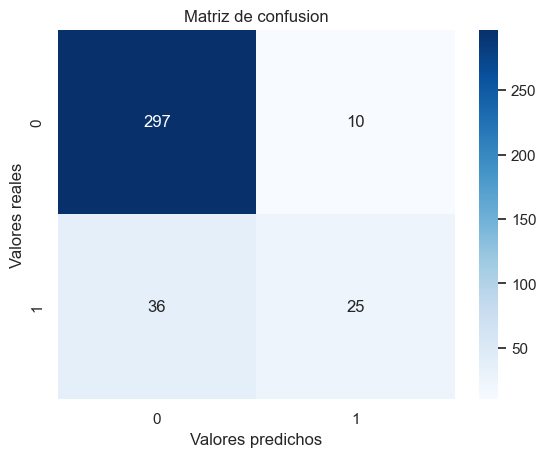

In [100]:
# Matriz de confusion (me gusto más este formato que el anterior, usaré este) 
def plot_matriz(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.set(font_scale=1)
  sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
  plt.title("Matriz de confusion")
  plt.xlabel("Valores predichos")
  plt.ylabel("Valores reales")
  plt.show()
# Graficar
plot_matriz(y_test,y_pred)

In [101]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       307
           1       0.71      0.41      0.52        61

    accuracy                           0.88       368
   macro avg       0.80      0.69      0.72       368
weighted avg       0.86      0.88      0.86       368



### Como no me acuerdo muy bien, debo aclarar que F1 es la "media armónica" entre la precisión y la exhaustividad. YYY una media armónica, no es nada más ni nada menos, que el recíproco de la media de los recíprocos de los datos involucrados (matemáticamente se llega muy fácil a estas fórmulas). La media armónica es muy recomendada para obtener medias entre velocidades y entre estos estadísticos. 

<td align="center">
    <img src="f1.png" alt="Fashion MNIST sprite"  width="250">
    <b>Figura_A: Fórmula F1<b/>
</td>

## Observaciones:

#### 1.- La tasa de acierto es de un 88%, es decir, cada 100 personas que el modelo afirme alguna predicción, 88 de ellas serán correctas. 
#### 2.- De cada 100 personas a las que el modelo afirma que se irán de la empresa, 71 realmente se irían (Precisión).
#### 3.- Por cada 100 personas que realmente se fueron de la empresa, el modelo solo predice a 45 de ellas. Otras 55 se fueron y no lo predijimos (Exhaustividad).
#### 4.- La media armónica entre la precisión y la exhaustividad es de 0.55, un F1 bajísimo.

## Conclusión:

#### A pesar de tener una tasa de acierto muy cercana al 90%, los resultados obtenidos por los clasificadores en el testing, sugieren que no es un buen modelo para poner en práctica.

# TAREA #8: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [102]:
# Vamos a obtener el modelo de ensamblamiento
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
y_pred = model2.predict(X_test)

In [104]:
# Revisamos
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [105]:
# Probamos el resultado con los KPIs
# Tasa de acierto
print("La tasa de acierto es de un {}%.".format(100*accuracy_score(y_test,y_pred)))

La tasa de acierto es de un 85.32608695652173%.


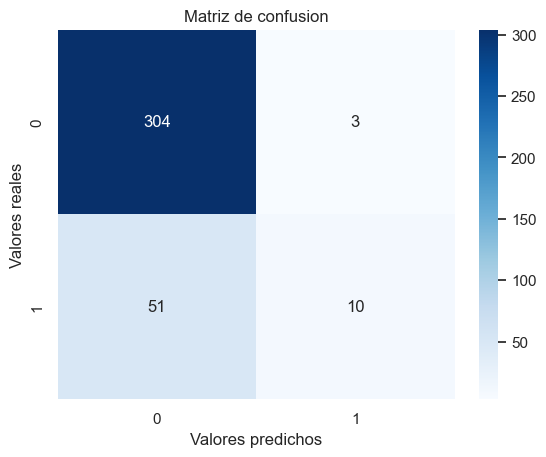

In [106]:
# Matriz de confusion
def plot_matriz(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.set(font_scale=1)
  sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
  plt.title("Matriz de confusion")
  plt.xlabel("Valores predichos")
  plt.ylabel("Valores reales")
  plt.show()
# Graficar
plot_matriz(y_test,y_pred)

In [107]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       307
           1       0.77      0.16      0.27        61

    accuracy                           0.85       368
   macro avg       0.81      0.58      0.59       368
weighted avg       0.84      0.85      0.81       368



In [108]:
# Resultados en el Conjunto de Testing

## Observaciones: recordar que RandomForestClassifier() tiene disponibles múltiples tipos de configuraciones matemáticas en sus opciones. 

### clase sklearn.ensemble. RandomForestClassifier ( n_estimators = 100 , * , criterio = 'gini' , max_ depth = Ninguno , min_samples_split = 2 , min_samples_leaf = 1 , min_weight_fraction_leaf = 0.0 , max_features = 'sqrt' , max_leaf_nodes = Ninguno , min_impureza_decrease = 0.0 , bootstrap = True ,oob_score = Falso , n_jobs = Ninguno , random_state = Ninguno , detallado = 0 , warm_start = Falso , class_weight = Ninguno , ccp_alpha = 0.0 , max_samples = Ninguno )

### Explicaciones en https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

## Observaciones

#### 1.- La tasa de acierto es de un 85.3%, es decir, cada 100 personas que el modelo afirme alguna predicción, 85 de ellas serán correctas. 
#### 2.- De cada 100 personas a las que el modelo afirma que se irán de la empresa, 71 realmente se irían (Precisión). Igualmente sucede esto en el modelo de Regresión Logística.
#### 3.- Por cada 100 personas que realmente se fueron de la empresa, el modelo solo predice a 17 de ellas. Otras 83 se podrían ir y no se podrá precir (Exhaustividad).
#### 4.- La media armónica entre la precisión y la exhaustividad es de 0.27, un F1 más bajo que el anterior.

## Conclusión:

#### Este modelo no es mejor que el anterior, por lo tanto, en caso de solo tener estas dos opciones, se sugiere utilizar el algoritmo anterior.

# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [109]:
import tensorflow as tf # importamos

model3 = tf.keras.models.Sequential() # creamos el modelo

## Añadiendo capas que se necesiten hasta completar la arquitectura
#### Primera capa oculta desde la entrada
#### Capa densa
#### Usando el rectificador lineal unitario para quedarme solo con las correlaciones positivas entre variables (también se podría usar la sigmoide)
#### Imput shape es obligatorio en la primera capa. Su entrada será con vectores de 49 variables c/u suministrada en lotes de tamaño variable (las 49 variables que tenemos como columnas de nuestro data set). 



In [110]:
model3.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape = (49,)))
model3.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model3.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [111]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25000     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 526,501
Trainable params: 526,501
Non-trainable params: 0
_________________________________________________________________


In [112]:
model3.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [113]:
# Codigo presente en el curso pero que no fue tocado ni explicado (AVERIGUAR):
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

## Luego de la compilación..
#### 1.- Guardaré en un historial de "EPOCH" para ver como mejora la precision y ver como se reduce el error en la clasificación.
#### 2.- Entrenamos no una, ni dos, ni tres veces, si no 100 epochs, es decir, se pasa al conjunto de entrenamiento un total de 100 veces (para eso el historial) para representar el progreso a lo largo del tiempo.
#### 3.- Finalmente indicamos que el tamaño del lote (batch_size) sea de tamaño 50. Esto permitirá el entrenamiento con 50 muestras aleatorias del conjunto de entrenamiento, estas muestras se pasaran por la red neuronal fit, se dará una predicción y cuando se haya medido el error de esas 50, el "Gradiante descendente" con el "Optimizador de Adam" corregiran la dirección para que los pesos cada vez den resultaods más positivos.

In [114]:
epochs_hist = model3.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.8358
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3483 - accuracy: 0.8566
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.8820
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.8975
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.8902
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.9111
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2115 - accuracy: 0.9156
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1640 - accuracy: 0.9401
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9555
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1327 - accuracy: 0.9474
Epoch 11/

In [115]:
# Realizamos la predicción de nuestro modelo
y_pred = model3.predict(X_test)
y_pred

12/12 [==============================] - 0s 3ms/step


array([[6.07545644e-07],
       [3.27643084e-14],
       [1.00000000e+00],
       [2.00487786e-08],
       [1.82026724e-12],
       [5.21748686e-11],
       [4.89803682e-08],
       [1.22593471e-25],
       [5.69899913e-17],
       [3.38941657e-14],
       [2.79906532e-11],
       [2.37717289e-14],
       [2.52682116e-06],
       [5.03204909e-08],
       [6.06045255e-15],
       [3.59090429e-08],
       [5.78439379e-18],
       [9.48181356e-09],
       [1.00000000e+00],
       [6.26008828e-11],
       [4.54274470e-07],
       [4.85790451e-06],
       [2.90887726e-07],
       [6.86326473e-07],
       [2.52732463e-07],
       [9.88437212e-04],
       [1.42638934e-19],
       [4.83123008e-09],
       [9.35165008e-06],
       [8.07801844e-04],
       [9.98024046e-01],
       [1.98403373e-03],
       [2.79426564e-14],
       [1.60575139e-13],
       [2.40027963e-12],
       [8.56047125e-16],
       [5.47214881e-07],
       [2.56371140e-11],
       [4.25219582e-11],
       [7.18392790e-10],


In [116]:
# Ahora tomaremos solo a los empleados que su probabilidad de dejar la empresa sea superior al 50% y lo transformaremos en True, los demás quedaran en False.
pred_y = (y_pred > 0.5)
pred_y

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

## Gráficos
#### Realizaremos una serie de gráficos para ver a través de las epochs del entrenamiento, como ha ido disminuyendo la perdida y como ha id mejorando la precisión. 

In [117]:
# Veamos que contiene el epoch history
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

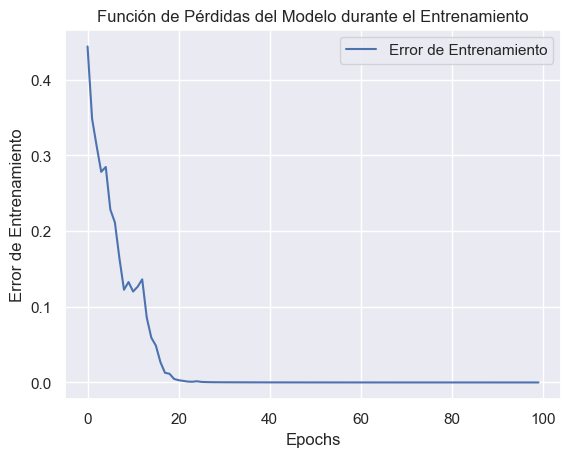

In [118]:
# Contiene dos parámetros, la perdida y la precisión.
# Pintaremos los epochs
plt.plot(epochs_hist.history['loss'])
plt.title('Función de Pérdidas del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Error de Entrenamiento')
plt.legend(['Error de Entrenamiento'])

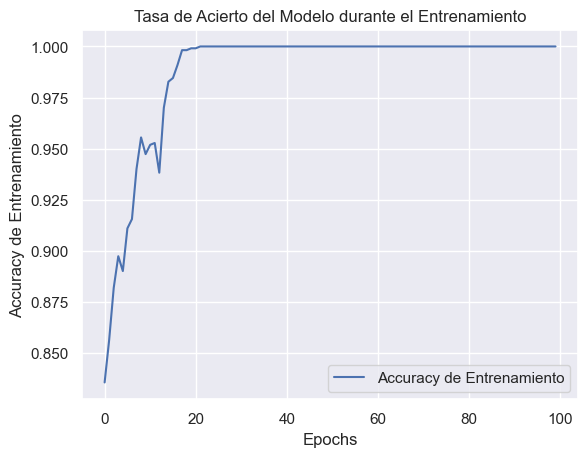

In [119]:
# Contiene dos parámetros, la perdida y la precisión.
# Pintaremos los epochs
plt.plot(epochs_hist.history['accuracy'])
plt.title('Tasa de Acierto del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy de Entrenamiento')
plt.legend(['Accuracy de Entrenamiento'])

## Aquí intento plotear la matriz y no me lo permite, aun no entiendo el error.

In [120]:
# Resultados en el Conjunto de Testing
# Matriz de confusion
# def plot_matriz(y_test,y_pred):
#  cm = confusion_matrix(y_test, y_pred)
#  sns.set(font_scale=1)
#  sns.heatmap(cm, annot=True,cmap='blue',fmt='g')
#  plt.title("Matriz de confusion")
#  plt.xlabel("Valores predichos")
#  plt.ylabel("Valores reales")
#  plt.show()
# Graficar
# plot_matriz(y_test,y_pred)

# TAREA #9: VISUALIZACIÓN DE LOS RESULTADOS EN TABLEAU

In [121]:
## Insertamos el Scoring de la Columna Attrition
X_all['scoring_attrition'] = model.predict_proba(X)[:, 1]
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,scoring_attrition
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.560246
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.038504
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.586635
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.190283
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.374408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.067487
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0.020925
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0.237144
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.037669


In [122]:
# Transformar de cvs a excel
X_all.to_excel("human_resources.xlsx", sheet_name="passengers", index=False)